In [1]:
## Important Options:
run_epochs =  100
run_model_type = "semi_y_VAE_GMM"

run_save_folder = "../../outputs/experiments_test/fashion_mnist/vaegmm_y2comp/" 
run_read_data_folder = "../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "10_samples_per_class" # 5; 10; 25, 50;


In [2]:
ls ../../outputs

experiments_test/


In [3]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --semi-supervise \
    --sup-loss-coeff 100.0 \
    --kl-anneal \
    --kl-anneal-start 0.0 \
    --kl-anneal-stop 1.0 \
    --kl-anneal-ratio 0.2 \
    --kl-anneal-delay-epochs 5 \
    --y-clean-prior 0.6 \
    --use-sup-weights \
    --fixed-prior-zy1-sigma 0.5 \
    --trust-set-name {trust_set_name}

# --fixed-prior-zy0-sigma 5.0 \ ## this is default option for above!


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=0.5, kl_anneal=True, kl_anneal_cycles=1, kl_anneal_delay_epochs=5, kl_anneal_ratio=0.2, kl_anneal_start=0.0, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='semi_y_VAE_GMM', number_epochs=100, output_folder='../../outputs/experiments_test/fashion_mnist/vaegmm_y2comp/', q_y_x_coeff=1.0, qy_sup_weights=[1.0, 1.5352113246917725], reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=True, sigma_eps_z_in=0.1, size_input=784, size_output=784, sup_loss_coeff=100.0, train_on_clean_data=False, trust_set_name='10_sam

### Define Paths

In [4]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [5]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [6]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

### Check VARS on Notebook

In [7]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.6)
compute_metrics        function         <function compute_metrics at 0x7fba7c6bb430>
dict_main_vars         dict             n=55
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7fb932607670>
file_path_data         str              ../../data/examples_fashi<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>mm_y2comp/semi_y_VAE_GMM/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7fb934da0c10>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [8]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', '_num_outliers_ts', '_num_inliers_ts', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'delay_beta_vec', '_delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output

### Load Packages 

In [9]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import semi_y_VAE_GMM
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [10]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'defs': {'combs_on': False,
          'max_val': 1,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': True},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': None,
 'train_size': 0.9,
 'trusted_set': {'dataset_size': 70000,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 18,
                 'percentages': [0.12857142857142856,
                                 0.2571428571428571,
                                 0.6428571428571428,
                                 1.2857142857142856],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [90, 180, 450, 900],
                 'use_labels': 'joint_clas

In [11]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 28]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [12]:
# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [13]:
args.data_folder

'../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/'

In [14]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,28)

y_targets_mdl = ~ torch.from_numpy(y_noise_instance_train).view(-1,1)

x_train_orig = X_train.view(-1,28,28).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,28).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [15]:
dataset_obj.cont_means

0.2880513707152192

In [16]:
dataset_obj.cont_stds

0.3558276959424768

In [17]:
X_train_clean.view(-1,28,28)

tensor([[[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         ...,
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095]],

        [[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         ...,
         [-0.8095, -0.8095, -0.8095,  ...,  0.2485, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.2254, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095]],

        [[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0

### Load Model

In [18]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (var_q_y): encodeBern(
    (torso_encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=784, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (param_nn): BernoulliDistModule(
      (logits): modSeq(
        (mods_list): ModuleList(
          (0): baseEncoder(
            (activ): ReLU()
            (feat_embedd): ModuleList()
            (mod_fw_seq): Sequential(
              (fc_0): Linear(in_features=784, out_features=200, bias=True)
              (activ_0): ReLU()
              (fc_1): Linear(in_features=200, out_features=100, bias=True)
              (activ_1): ReLU()
              (fc_2): Linear(in_features=100, out_features=50, bias=True)
              (a

### Load Results from Folder

In [19]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [20]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [21]:
df_train_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1       -35.851376      -60.741043       0.708459  -60.741043   
1        2      -165.640904     -189.454483       0.678764 -189.454483   
2        3      -263.000414     -283.743374       0.591770 -283.743374   
3        4      -330.083310     -349.967029       0.568473 -349.967029   
4        5      -373.269381     -391.449892       0.518509 -391.449892   
..     ...              ...             ...            ...         ...   
95      96      -234.383017     -486.905541       7.265935 -527.783205   
96      97      -235.456747     -487.979270       7.265935 -528.579946   
97      98      -233.950127     -486.472650       7.265935 -527.173272   
98      99      -234.495830     -487.018352       7.265935 -527.328297   
99     100      -233.638280     -486.160803       7.265935 -527.081001   

    Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  \
0     781.392629    0.033709    1473.527094     143.619704   
1     923.959389    0.019963    1664.284139     159.494294   
2    1065.240861    0.012872    1666.201337     172.006163   
3    1123.350425    0.030493    1587.644137     178.469969   
4     983.950218    0.035615    1485.175538     186.759550   
..           ...         ...            ...            ...   
95     40.877663    0.509123      40.336218      66.473440   
96     40.600679    0.509123      40.059105      66.212817   
97     40.700623    0.509123      40.159119      66.247841   
98     40.309944    0.509123      39.768505      65.899973   
99     40.920199    0.509123      40.378812      66.482547   

    AUC Cell nll score  AVPR Cell nll score  AUC Row nll score  \
0             0.818503             0.305417           0.694856   
1             0.794803             0.286971           0.691851   
2             0.741562             0.209658           0.661215   
3             0.698575             0.153438           0.629437   
4             0.665967             0.117263           0.606064   
..                 ...                  ...                ...   
95            0.622170             0.056710           0.552452   
96            0.626132             0.057392           0.552207   
97            0.629341             0.059091           0.552296   
98            0.631931             0.057810           0.554102   
99            0.625540             0.056431           0.553660   

    AVPR Row nll score  AUC Row class_y score  AVPR Row class_y score  \
0             0.469823               0.481750                0.297862   
1             0.465929               0.632298                0.489572   
2             0.432198               0.729652                0.596383   
3             0.402387               0.660896                0.498172   
4             0.382623               0.714622                0.573859   
..                 ...                    ...                     ...   
95            0.343790               0.499986                0.318278   
96            0.343522               0.500016                0.318288   
97            0.343708               0.500000                0.318278   
98            0.344881               0.500000                0.318278   
99            0.344531               0.500000                0.318278   

    Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                         0.267021                        2.794622   
1                         0.218869                        2.794622   
2                         0.207906                        2.794622   
3                         0.188640                        2.794622   
4                         0.181950                        2.794622   
..                             ...                             ...   
95                        0.139471                        2.794622   
96                        0.137946                        2.794622   
97                        0.136565                        2.794622   


In [22]:
df_valid_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1       -59.910043      -59.910043            0.0  -59.910043   
1        2      -187.935001     -187.935001            0.0 -187.935001   
2        3      -281.199507     -281.199507            0.0 -281.199507   
3        4      -345.941315     -345.941315            0.0 -345.941315   
4        5      -386.309516     -386.309516            0.0 -386.309516   
..     ...              ...             ...            ...         ...   
95      96      -470.725781     -470.725781            0.0 -511.492846   
96      97      -471.740714     -471.740714            0.0 -512.249177   
97      98      -470.451173     -470.451173            0.0 -511.050158   
98      99      -471.090277     -471.090277            0.0 -511.295606   
99     100      -469.588189     -469.588189            0.0 -510.396457   

    Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  \
0     776.668854    0.031349    1465.624586     143.149554   
1     918.955777    0.017804    1655.982758     159.051377   
2    1061.730824    0.011227    1657.831536     171.480442   
3    1120.299646    0.029368    1579.629628     177.934916   
4     980.541385    0.034138    1476.610625     186.079659   
..           ...         ...            ...            ...   
95     40.767066    0.510826      40.256240      66.448372   
96     40.508461    0.510826      39.997635      66.197869   
97     40.598983    0.510826      40.088157      66.232572   
98     40.205324    0.510826      39.694498      65.876276   
99     40.808265    0.510826      40.297439      66.440118   

    AUC Cell nll score  AVPR Cell nll score  AUC Row nll score  \
0             0.830605             0.307384           0.690475   
1             0.805901             0.290323           0.686662   
2             0.757516             0.217586           0.656732   
3             0.708317             0.160442           0.626258   
4             0.671706             0.123485           0.605210   
..                 ...                  ...                ...   
95            0.642159             0.063331           0.555462   
96            0.636383             0.064461           0.554766   
97            0.640918             0.066516           0.554560   
98            0.639431             0.063849           0.556273   
99            0.633474             0.063702           0.555779   

    AVPR Row nll score  AUC Row class_y score  AVPR Row class_y score  \
0             0.461407               0.482676                0.300283   
1             0.458668               0.632168                0.489785   
2             0.427986               0.725646                0.587232   
3             0.400911               0.651188                0.484261   
4             0.383776               0.706245                0.564118   
..                 ...                    ...                     ...   
95            0.350112               0.500000                0.320333   
96            0.349961               0.500000                0.320333   
97            0.349592               0.500000                0.320333   
98            0.351053               0.500000                0.320333   
99            0.350732               0.500000                0.320333   

    Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                         0.285533                        2.805226   
1                         0.235544                        2.805226   
2                         0.224476                        2.805226   
3                         0.208458                        2.805226   
4                         0.198979                        2.805226   
..                             ...                             ...   
95                        0.155328                        2.805226   
96                        0.155801                        2.805226   
97                        0.154279                        2.805226   


In [23]:
df_test_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1       -59.910043      -59.910043            0.0  -59.910043   
1        2      -187.935001     -187.935001            0.0 -187.935001   
2        3      -281.199507     -281.199507            0.0 -281.199507   
3        4      -345.941315     -345.941315            0.0 -345.941315   
4        5      -386.309516     -386.309516            0.0 -386.309516   
..     ...              ...             ...            ...         ...   
95      96      -470.725781     -470.725781            0.0 -511.492846   
96      97      -471.740714     -471.740714            0.0 -512.249177   
97      98      -470.451173     -470.451173            0.0 -511.050158   
98      99      -471.090277     -471.090277            0.0 -511.295606   
99     100      -469.588189     -469.588189            0.0 -510.396457   

    Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  \
0     776.668854    0.031349    1465.624586     143.149554   
1     918.955777    0.017804    1655.982758     159.051377   
2    1061.730824    0.011227    1657.831536     171.480442   
3    1120.299646    0.029368    1579.629628     177.934916   
4     980.541385    0.034138    1476.610625     186.079659   
..           ...         ...            ...            ...   
95     40.767066    0.510826      40.256240      66.448372   
96     40.508461    0.510826      39.997635      66.197869   
97     40.598983    0.510826      40.088157      66.232572   
98     40.205324    0.510826      39.694498      65.876276   
99     40.808265    0.510826      40.297439      66.440118   

    AUC Cell nll score  AVPR Cell nll score  AUC Row nll score  \
0             0.830605             0.307384           0.690475   
1             0.805901             0.290323           0.686662   
2             0.757516             0.217586           0.656732   
3             0.708317             0.160442           0.626258   
4             0.671706             0.123485           0.605210   
..                 ...                  ...                ...   
95            0.642159             0.063331           0.555462   
96            0.636383             0.064461           0.554766   
97            0.640918             0.066516           0.554560   
98            0.639431             0.063849           0.556273   
99            0.633474             0.063702           0.555779   

    AVPR Row nll score  AUC Row class_y score  AVPR Row class_y score  \
0             0.461407               0.482676                0.300283   
1             0.458668               0.632168                0.489785   
2             0.427986               0.725646                0.587232   
3             0.400911               0.651188                0.484261   
4             0.383776               0.706245                0.564118   
..                 ...                    ...                     ...   
95            0.350112               0.500000                0.320333   
96            0.349961               0.500000                0.320333   
97            0.349592               0.500000                0.320333   
98            0.351053               0.500000                0.320333   
99            0.350732               0.500000                0.320333   

    Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                         0.285533                        2.805226   
1                         0.235544                        2.805226   
2                         0.224476                        2.805226   
3                         0.208458                        2.805226   
4                         0.198979                        2.805226   
..                             ...                             ...   
95                        0.155328                        2.805226   
96                        0.155801                        2.805226   
97                        0.154279                        2.805226   


In [24]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [25]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -233.638280
Avg. LOSS_ELBO                             -486.160803
Avg. LOSS_SUP                                 7.265935
Avg. NLL                                   -527.081001
Avg. KLD_TOT                                 40.920199
Avg. KLD_Y                                    0.509123
Avg. KLD_Z_Y1                                40.378812
Avg. KLD_Z_Y0                                66.482547
AUC Cell nll score                            0.625540
AVPR Cell nll score                           0.056431
AUC Row nll score                             0.553660
AVPR Row nll score                            0.344531
AUC Row class_y score                         0.500000
AVPR Row class_y score                        0.318278
Error lower-bound on dirty pos                0.140974
Error upper-bound on dirty pos                2.794622
Error repair on dirty pos                     2.464522
Error repa

In [26]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -469.588189
Avg. LOSS_ELBO                             -469.588189
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -510.396457
Avg. KLD_TOT                                 40.808265
Avg. KLD_Y                                    0.510826
Avg. KLD_Z_Y1                                40.297439
Avg. KLD_Z_Y0                                66.440118
AUC Cell nll score                            0.633474
AVPR Cell nll score                           0.063702
AUC Row nll score                             0.555779
AVPR Row nll score                            0.350732
AUC Row class_y score                         0.500000
AVPR Row class_y score                        0.320333
Error lower-bound on dirty pos                0.158186
Error upper-bound on dirty pos                2.805226
Error repair on dirty pos                     2.434053
Error repa

### Test Dataset Final Results

In [27]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -469.588189
Avg. LOSS_ELBO                             -469.588189
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -510.396457
Avg. KLD_TOT                                 40.808265
Avg. KLD_Y                                    0.510826
Avg. KLD_Z_Y1                                40.297439
Avg. KLD_Z_Y0                                66.440118
AUC Cell nll score                            0.633474
AVPR Cell nll score                           0.063702
AUC Row nll score                             0.555779
AVPR Row nll score                            0.350732
AUC Row class_y score                         0.500000
AVPR Row class_y score                        0.320333
Error lower-bound on dirty pos                0.158186
Error upper-bound on dirty pos                2.805226
Error repair on dirty pos                     2.434053
Error repa

## PLOTS TRAIN DATASET

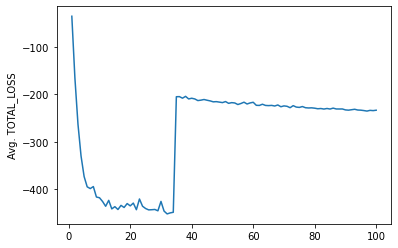

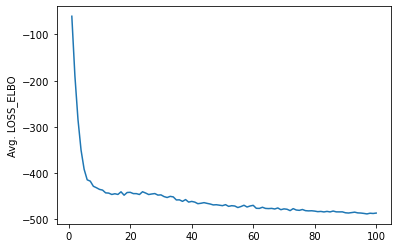

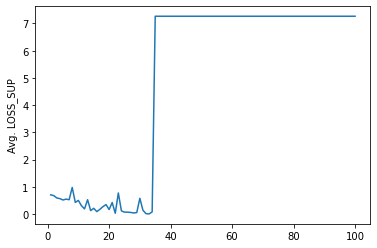

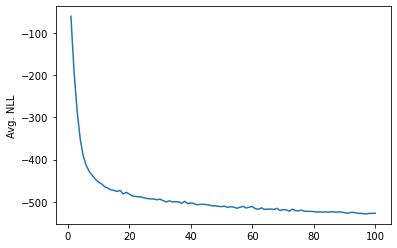

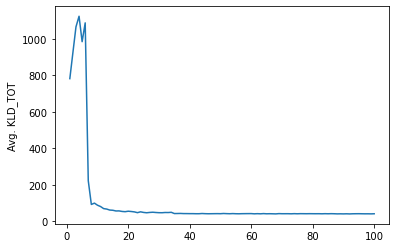

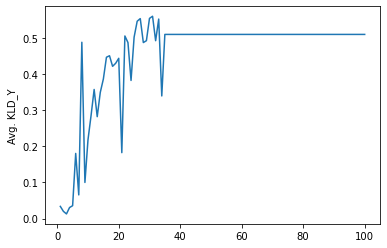

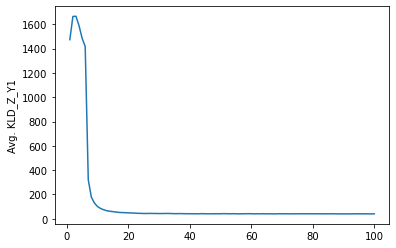

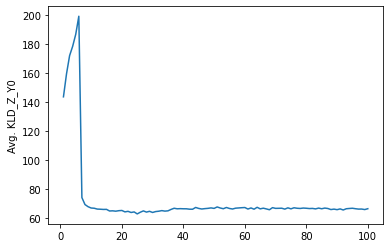

In [28]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

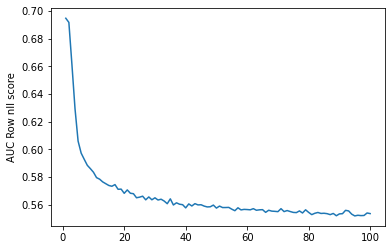

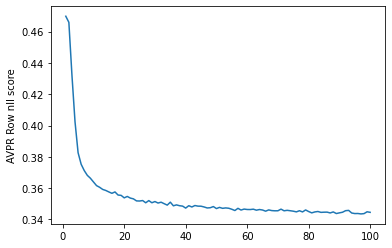

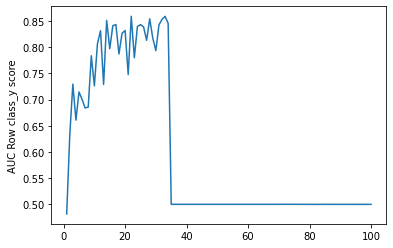

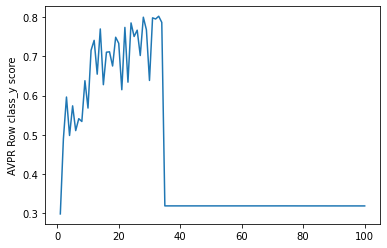

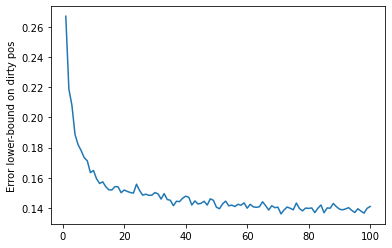

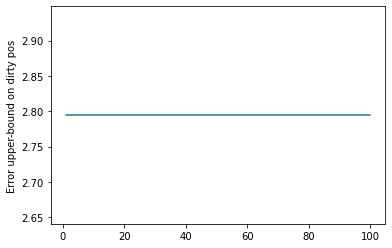

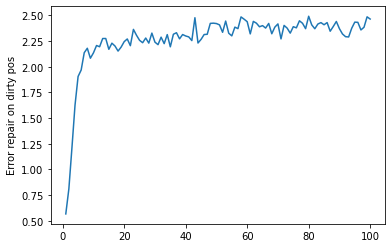

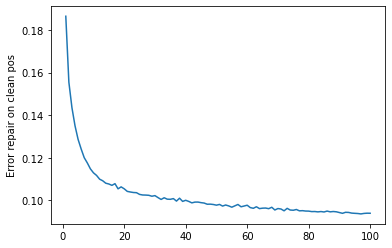

In [29]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

## Plots Validation -- Losses

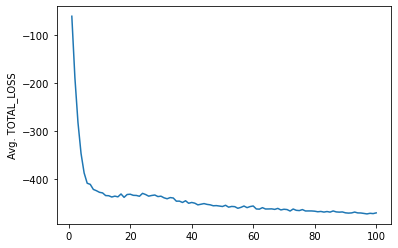

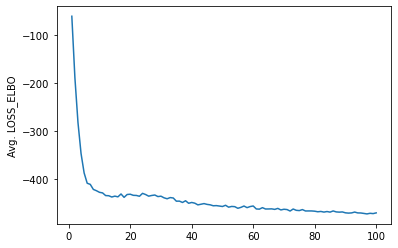

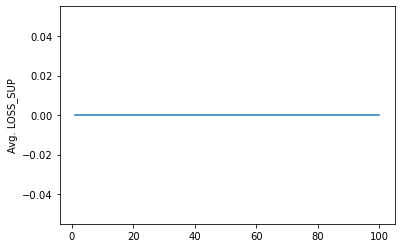

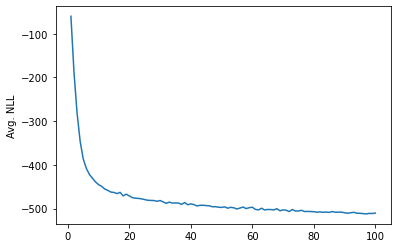

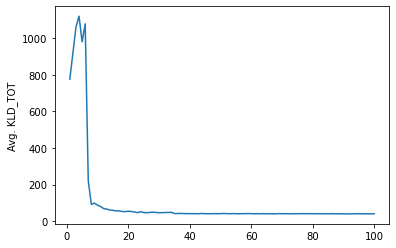

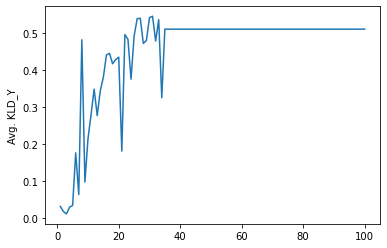

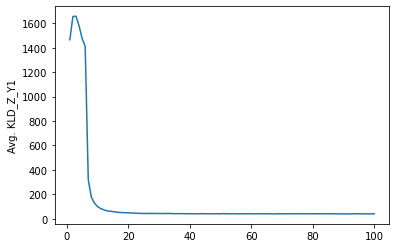

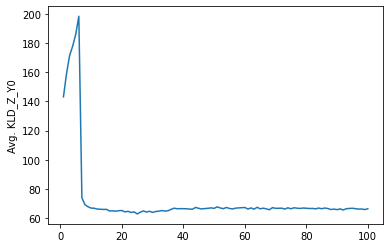

In [30]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

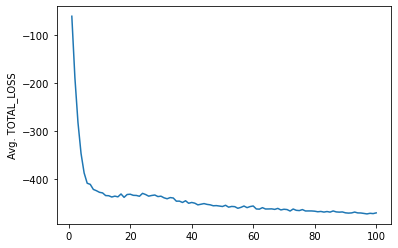

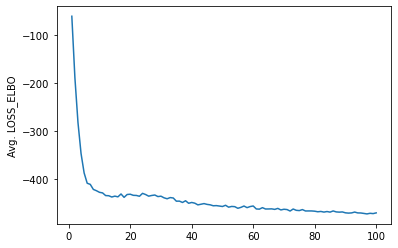

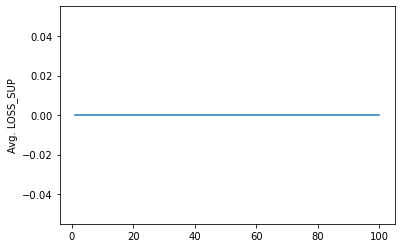

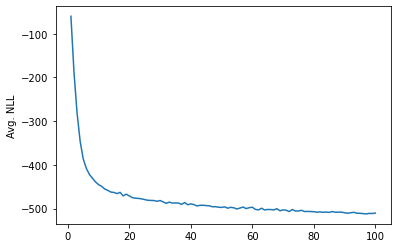

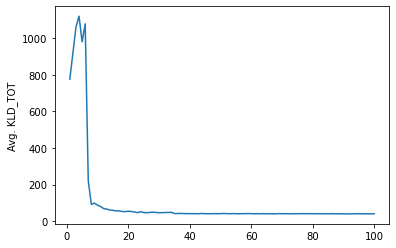

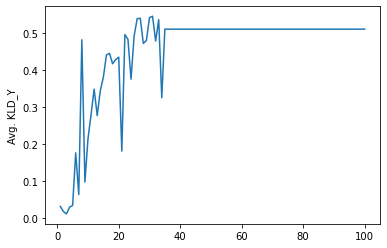

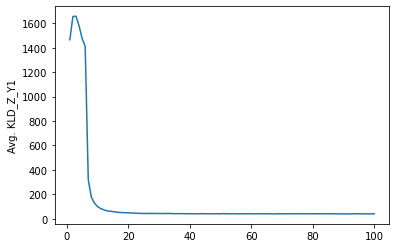

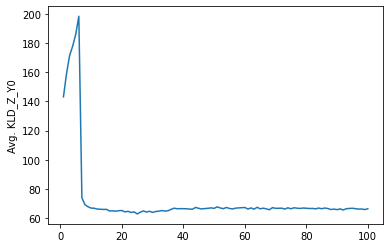

In [31]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [32]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_dirty = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)


In [33]:
# Plot mu's and covariance's

z_train_y1_mu = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_y0_mu = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)

z_train_y1_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy()) # is z_y1 (clean)
z_train_y0_var = np.exp(vae_q_params['z_y0']['logvar'].detach().cpu().numpy()) # is z_y0 (dirty)

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_y1_var, axis=0)))
print("median of variances (per dim), dirty: \n {} \n".format(np.median(z_train_y0_var, axis=0)))

print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_y1_mu, axis=0)))
print("median of means (per dim), dirty: \n {} \n".format(np.median(z_train_y0_mu, axis=0)))

median of variances (per dim), clean: 
 [0.0001387  0.00214034 0.0009264  0.00219613 0.00391539 0.00061368
 0.0024236  0.00044692 0.00309458 0.00326333 0.00141676 0.00031125
 0.00399442 0.00042889 0.00215891] 

median of variances (per dim), dirty: 
 [0.00014992 0.0022451  0.0009843  0.00231056 0.00408903 0.00065679
 0.00253937 0.00048096 0.00324195 0.00341299 0.00149757 0.00033462
 0.00417068 0.00045892 0.00227587] 

median of means (per dim), clean: 
 [-0.10781263  0.04074553  0.05475015  0.01660053  0.02455384 -0.05081536
  0.0087078  -0.03665563  0.01289644 -0.02319015  0.08103406 -0.01442918
  0.02333622  0.11722183 -0.0085019 ] 

median of means (per dim), dirty: 
 [-0.10793118  0.03455373  0.06245576  0.00786196  0.02520467 -0.06167728
  0.01308072 -0.04051316  0.00207991 -0.02734076  0.08315445 -0.01570718
  0.03188067  0.1249845  -0.02316147] 



In [34]:
recon_imgs_train = recons_train.reshape(-1,28,28)*dataset_obj.cont_stds + dataset_obj.cont_means

### Show Clean Datapoints at Random

y_noise: 0


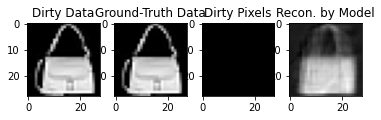

y_noise: 0


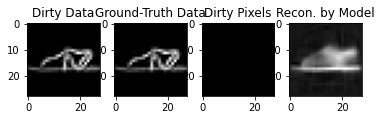

y_noise: 0


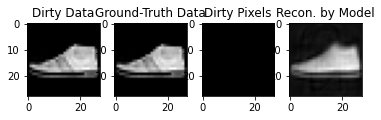

y_noise: 0


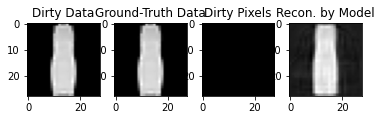

y_noise: 0


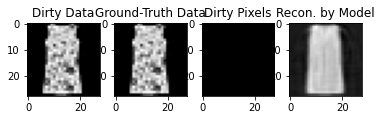

y_noise: 0


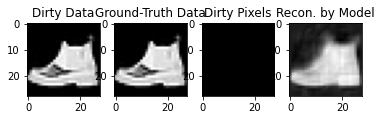

y_noise: 0


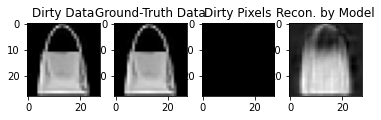

y_noise: 0


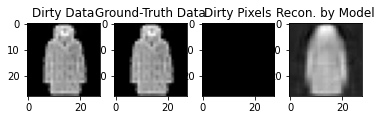

y_noise: 0


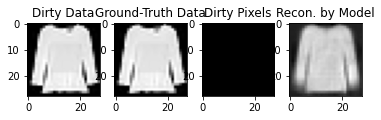

y_noise: 0


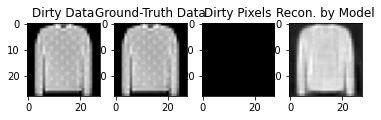

y_noise: 0


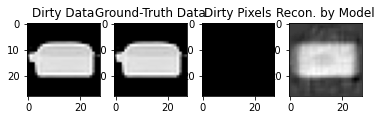

y_noise: 0


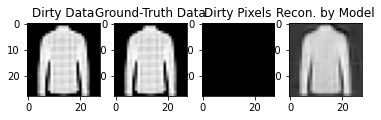

y_noise: 0


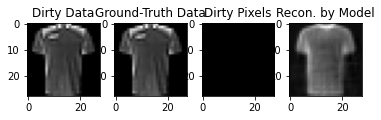

y_noise: 0


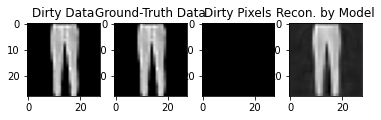

y_noise: 0


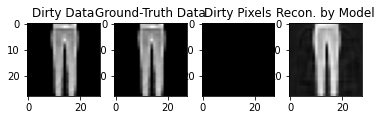

y_noise: 0


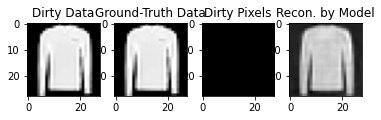

y_noise: 0


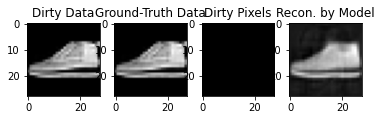

y_noise: 0


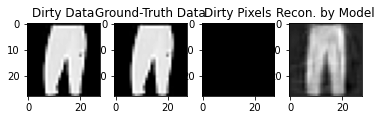

y_noise: 0


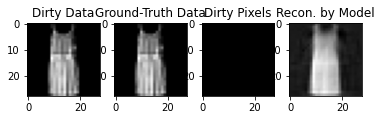

y_noise: 0


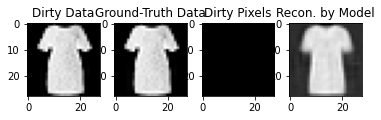

y_noise: 0


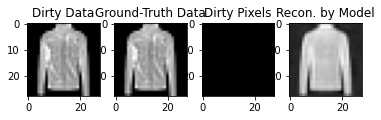

y_noise: 0


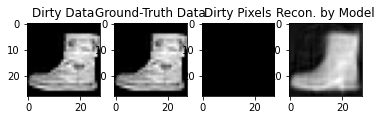

y_noise: 0


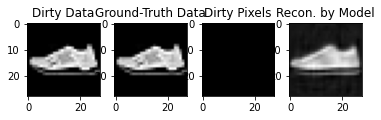

y_noise: 0


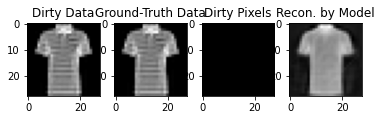

y_noise: 0


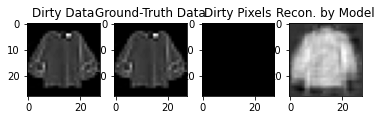

In [35]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Dirty Datapoints at Random

y_noise: 1


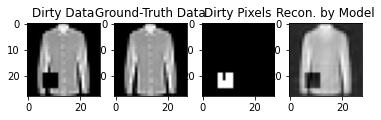

y_noise: 1


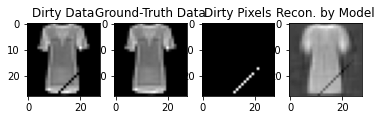

y_noise: 1


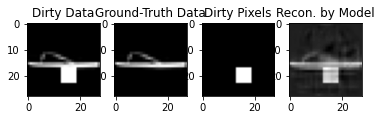

y_noise: 1


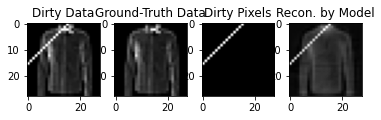

y_noise: 1


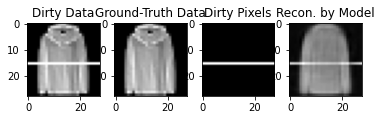

y_noise: 1


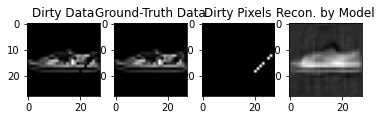

y_noise: 1


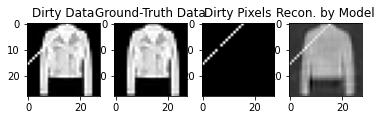

y_noise: 1


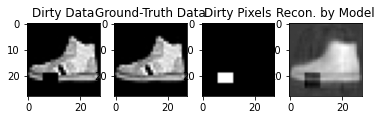

y_noise: 1


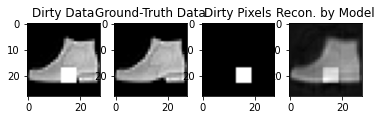

y_noise: 1


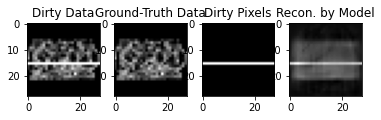

y_noise: 1


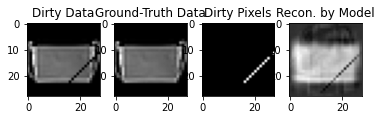

y_noise: 1


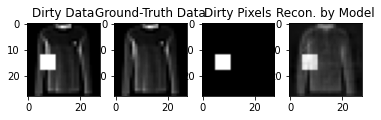

y_noise: 1


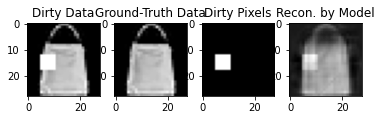

y_noise: 1


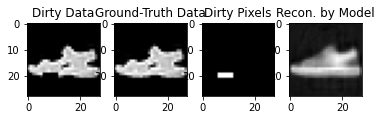

y_noise: 1


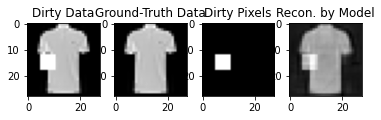

y_noise: 1


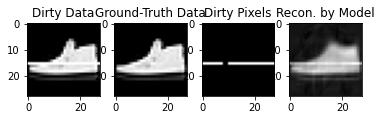

y_noise: 1


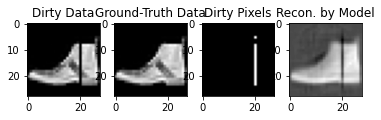

y_noise: 1


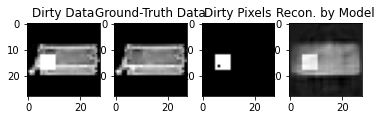

y_noise: 1


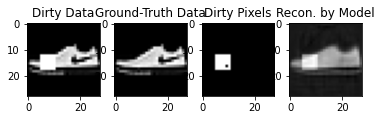

y_noise: 1


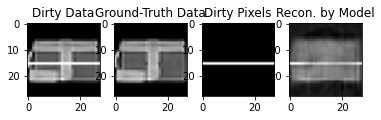

y_noise: 1


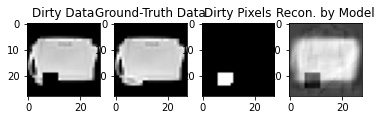

y_noise: 1


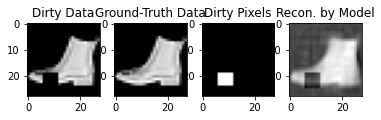

y_noise: 1


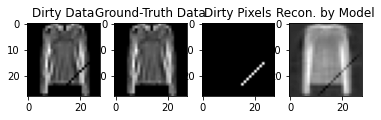

y_noise: 1


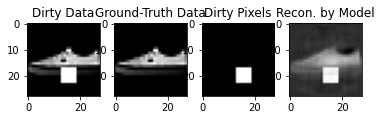

y_noise: 1


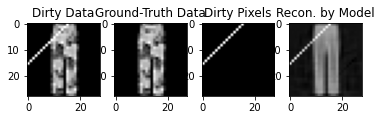

In [36]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show per noise type images: y_noise_lists or y_noise_dict

Noise Tag: 0
Noise Indices: 
[49931, 9771, 2510, 33084, 41761, 7530, 38857, 53534, 21939, 14918, 39744, 15426, 32323, 20632, 7050, 4447, 45382, 43836, 889, 11720, 39865, 23198, 11298, 30709, 25732, 51560, 47193, 427, 49007, 30733, 329, 184, 50395, 16263, 15873, 8737, 9298, 20931, 8146, 14359, 29429, 24443, 8078, 5111, 42352, 40877, 34124, 11758, 16969, 35456, 33512, 17311, 31692, 29687, 18192, 354, 14346, 18371, 29243, 5827, 22187, 33753, 22468, 825, 36417, 25156, 6677, 11892, 39455, 28598, 28866, 29012, 49705, 18478, 17475, 29010, 46510, 52853, 3951, 32273, 51429, 38786, 18792, 45433, 41177, 38580, 41392, 43421, 1829, 10511, 46151, 23010, 32478, 40374, 44815, 15102, 33016, 14001, 48481, 14646, 1842, 27806, 24926, 44427, 50380, 21210, 11946, 44239, 47652, 24080, 12759, 17001, 28553, 24581, 45890, 43155, 29797, 18559, 5625, 24354, 50551, 10438, 8258, 18819, 275, 17584, 43356, 51916, 18405, 48138, 30938, 53837, 42044, 14145, 29088, 12916, 49020, 19994, 23257, 1813, 16677, 51223, 39860, 4

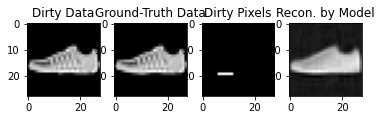

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


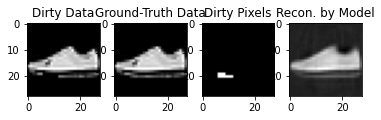

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


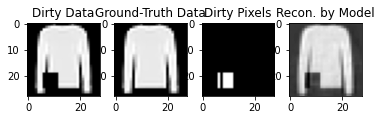

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


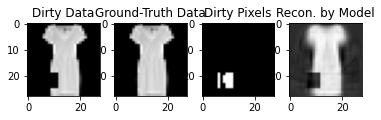

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


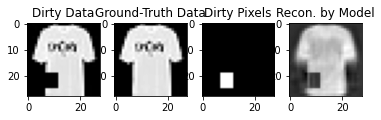

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


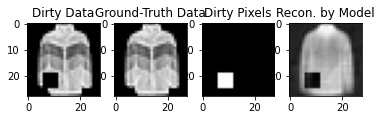

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


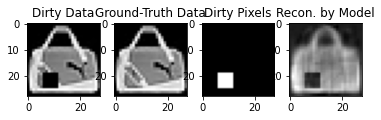

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


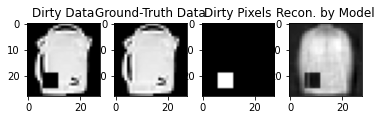

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


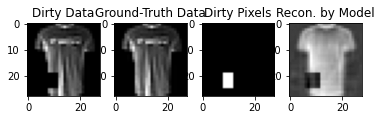

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


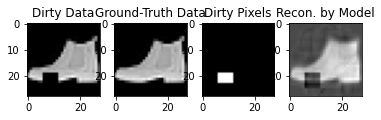







Noise Tag: 1
Noise Indices: 
[2268, 27023, 39295, 17345, 23381, 6724, 21779, 49332, 37763, 12352, 25490, 41004, 12120, 6851, 41191, 52734, 44138, 21195, 4012, 50839, 26136, 27191, 47045, 32952, 32785, 33875, 180, 24843, 24830, 35419, 7378, 1449, 39752, 48949, 20210, 44486, 35491, 42932, 19214, 13789, 40058, 8047, 42606, 47808, 47673, 24398, 11586, 44102, 20568, 1178, 8153, 37296, 29438, 14731, 39789, 17290, 20623, 20929, 7169, 13747, 16563, 4010, 42029, 50463, 47743, 5627, 1226, 42234, 46227, 22186, 18626, 34349, 14634, 4621, 13437, 8454, 9712, 49154, 34317, 53145, 49726, 37859, 33263, 34665, 40696, 41405, 11476, 45200, 7882, 37604, 34107, 35467, 46351, 5691, 7024, 27817, 18010, 34990, 25649, 2467, 7496, 48471, 21818, 43230, 50845, 44807, 14064, 23710, 29736, 10954, 27924, 37189, 17806, 37304, 17359, 31668, 49679, 20145, 8828, 27718, 5125, 9530, 12210, 32245, 17811, 12839, 41861, 21972, 22912, 25390, 2701, 43408, 51433, 48214, 44325, 49314, 22992, 23018, 36675, 12335, 7484, 7078,

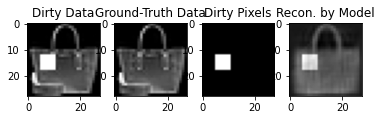

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


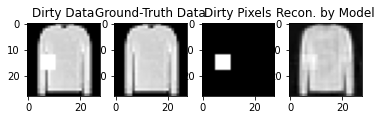

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


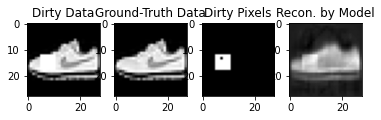

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


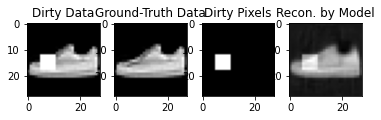

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


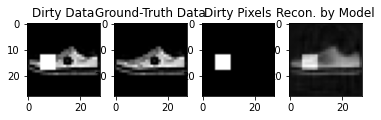

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


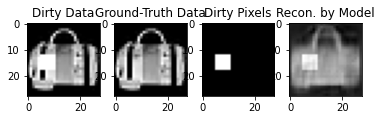

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


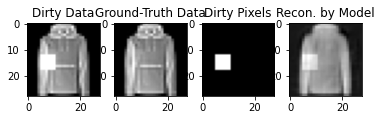

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


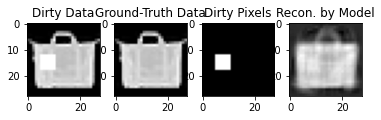

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


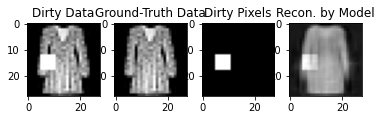

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


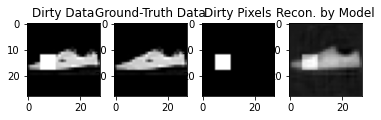







Noise Tag: 2
Noise Indices: 
[52779, 17788, 34554, 13623, 10531, 13700, 33584, 52448, 45317, 20115, 9326, 35823, 34557, 5426, 6829, 44986, 33693, 25305, 40581, 16629, 16001, 48505, 25911, 9510, 5268, 21970, 24585, 32050, 43151, 22268, 36353, 8949, 6303, 48762, 34382, 16466, 18890, 21839, 24773, 17496, 49823, 9462, 41420, 27798, 23594, 44911, 16838, 48332, 33951, 14218, 20845, 42306, 40390, 38054, 48068, 12499, 1548, 45174, 4040, 23881, 43826, 50418, 28417, 27913, 21362, 25921, 11775, 18170, 42183, 3415, 2611, 46995, 24266, 37984, 41214, 20917, 19490, 29409, 31751, 42060, 28040, 42123, 29576, 7119, 27383, 51591, 16515, 14063, 28379, 8023, 25618, 39199, 35583, 6326, 15419, 2340, 49177, 13897, 48046, 8501, 50772, 20143, 37360, 30964, 17317, 27474, 4111, 12250, 42540, 14790, 15091, 38929, 31914, 50222, 31321, 49903, 29467, 41790, 23972, 53082, 27071, 27897, 38879, 26217, 15853, 34636, 5430, 33746, 39250, 13322, 36011, 5819, 8590, 42478, 17616, 14345, 32335, 12681, 32986, 34195, 18549

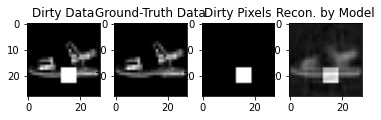

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


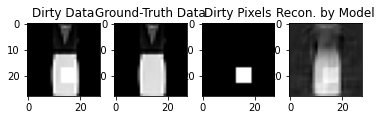

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


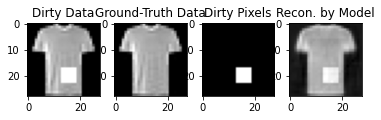

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


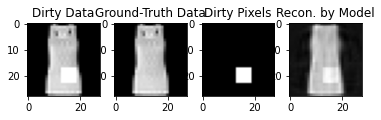

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


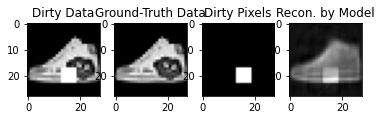

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


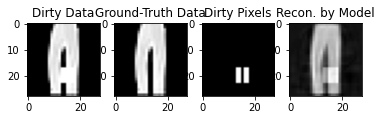

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


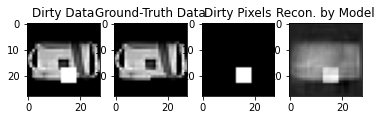

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


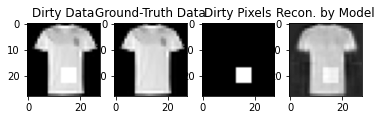

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


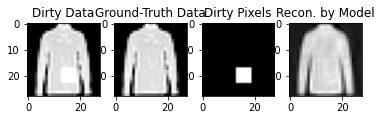

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


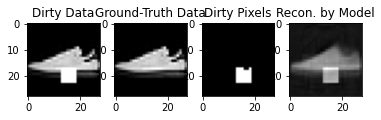







Noise Tag: 3
Noise Indices: 
[5853, 11247, 42551, 7181, 16971, 50044, 51782, 14722, 29140, 37744, 25137, 53907, 10840, 14324, 16757, 53262, 41469, 17974, 15416, 24707, 37293, 38816, 10987, 22127, 2641, 49496, 15671, 46066, 19139, 41891, 28160, 25336, 46399, 42703, 45763, 5178, 3483, 20680, 18845, 47719, 28075, 19678, 36318, 32345, 52609, 11071, 10666, 3146, 27766, 33779, 50527, 41442, 32319, 11920, 49201, 13393, 32048, 2091, 25676, 15667, 33091, 34035, 44390, 11182, 41226, 48094, 6797, 22581, 31176, 15013, 46307, 43893, 46453, 19705, 24350, 50379, 17524, 31972, 42550, 27037, 40082, 10809, 33896, 36274, 43520, 2846, 20520, 52770, 87, 26287, 22785, 30434, 16825, 48967, 24420, 6168, 46186, 37347, 45750, 48761, 49970, 41902, 34316, 3986, 52396, 19508, 37782, 45893, 34641, 33108, 32615, 30878, 8517, 28092, 3382, 43271, 3782, 2159, 12477, 51915, 5820, 25592, 32593, 8429, 25471, 33774, 47607, 25334, 283, 46247, 22726, 8026, 43521, 31427, 8226, 28153, 44405, 29219, 25611, 50983, 11965, 4

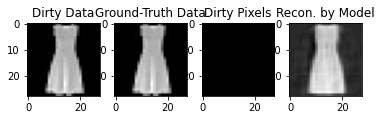

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


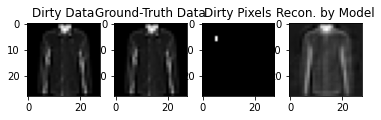

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


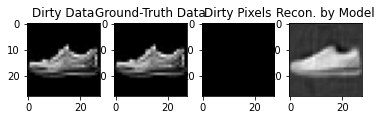

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


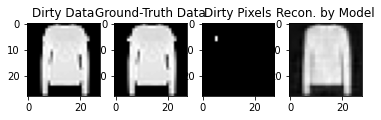

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


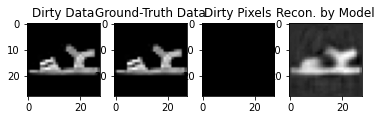

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


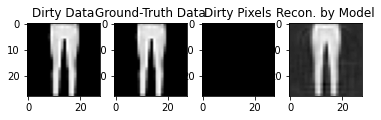

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


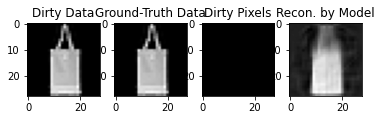

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


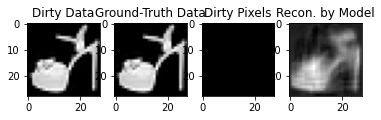

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


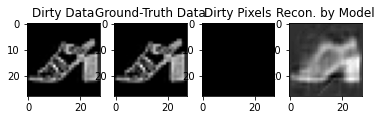

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


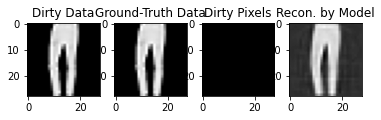







Noise Tag: 4
Noise Indices: 
[48575, 31148, 48450, 33830, 7987, 10979, 1890, 18322, 19790, 45950, 7745, 3091, 23937, 53797, 25488, 44933, 51698, 48005, 17100, 1365, 19039, 4002, 37067, 17886, 32907, 43312, 51657, 6153, 3318, 42061, 22969, 9812, 8061, 1077, 27400, 35271, 39484, 24516, 30069, 45491, 46324, 18508, 12583, 9978, 21282, 44903, 17853, 41611, 23748, 2369, 27320, 38491, 46181, 47549, 11944, 39121, 47470, 4845, 6150, 22136, 20136, 7640, 19879, 36558, 30010, 11538, 23295, 43274, 12090, 35806, 36044, 28327, 30707, 52095, 9025, 13832, 14662, 53234, 23949, 51981, 37775, 48746, 8821, 23859, 32559, 1272, 24058, 4869, 6784, 35433, 31126, 7079, 51871, 32266, 6666, 22040, 44831, 25763, 17982, 29302, 15324, 51808, 4417, 45326, 14601, 35863, 30904, 5610, 47043, 53370, 35717, 16154, 41557, 14105, 37807, 37335, 2009, 15439, 30029, 41156, 4303, 41094, 22388, 12831, 8792, 43175, 35699, 5881, 45136, 22659, 30368, 43694, 11220, 13492, 43669, 6849, 46615, 51712, 3833, 22157, 18750, 19896, 2

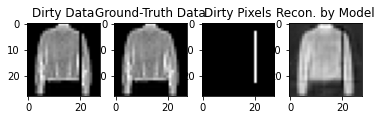

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


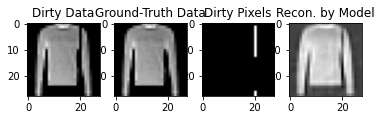

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 4


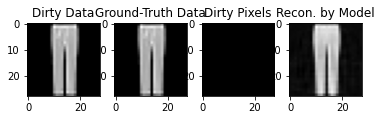

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


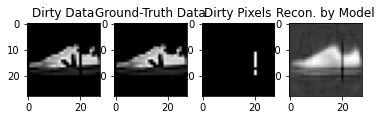

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


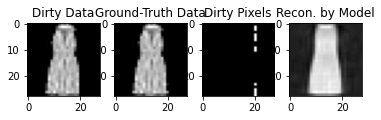

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


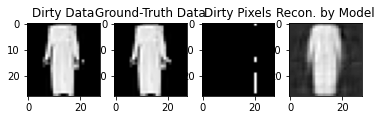

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


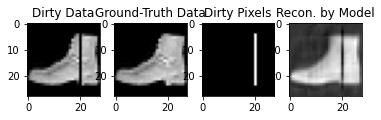

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


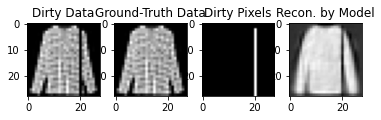

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


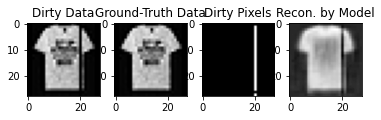

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


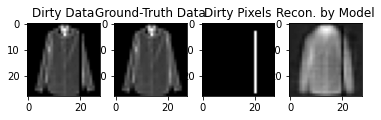







Noise Tag: 5
Noise Indices: 
[41366, 35857, 21758, 42930, 12425, 8919, 20074, 21360, 50284, 28505, 15387, 39772, 36500, 27442, 25985, 34272, 53223, 47175, 49465, 34404, 13910, 10124, 31626, 10920, 21897, 45556, 48088, 927, 43309, 27611, 16062, 4233, 20249, 25116, 36367, 11843, 3978, 4677, 22660, 43990, 31854, 34732, 53976, 3017, 1199, 49324, 44998, 27176, 11041, 18810, 29453, 34407, 4060, 17860, 20989, 15437, 10472, 2443, 9296, 13823, 17272, 24867, 10225, 27133, 32026, 17337, 35463, 34341, 41976, 29866, 35635, 24225, 14893, 45092, 47172, 347, 26071, 9039, 9220, 45828, 52221, 34739, 44667, 3012, 9371, 5393, 18051, 11131, 53536, 17752, 12194, 13315, 19093, 36948, 1780, 49077, 2266, 9322, 5217, 48240, 16182, 17219, 20798, 31912, 48181, 9518, 3780, 2652, 9397, 10342, 23460, 12787, 9150, 45606, 18477, 21612, 2721, 42149, 47290, 21396, 24486, 38086, 39885, 6469, 41985, 17023, 7632, 45420, 3602, 7466, 11383, 50371, 36845, 49424, 17898, 41024, 53137, 43949, 30608, 51186, 29372, 37628, 98

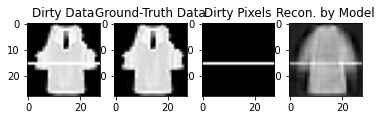

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


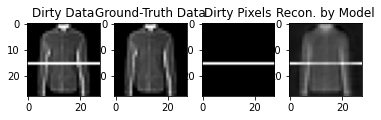

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


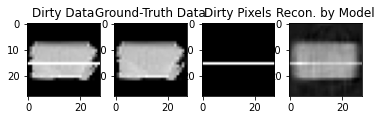

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


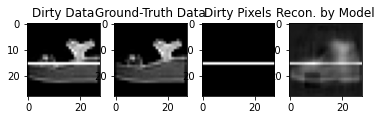

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


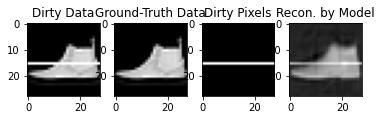

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


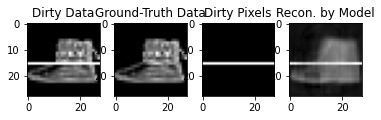

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


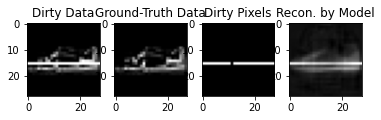

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


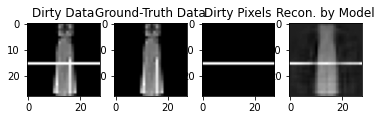

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


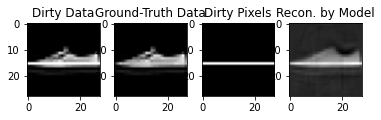

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


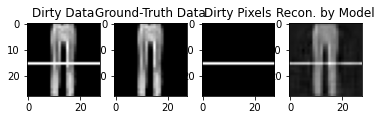







Noise Tag: 6
Noise Indices: 
[7450, 18091, 53161, 49480, 23297, 20825, 49950, 46922, 31791, 47239, 2759, 29933, 3967, 27056, 21588, 45917, 35274, 28391, 21857, 29897, 36213, 6516, 176, 35957, 31686, 6767, 35148, 34819, 49806, 7968, 32919, 10499, 53674, 11399, 46287, 8599, 1729, 26381, 47936, 19166, 14568, 49535, 26586, 34736, 32886, 37672, 13489, 44418, 19345, 24421, 36282, 33142, 3854, 10495, 36854, 44158, 19598, 621, 36704, 43908, 48847, 823, 48437, 43716, 49681, 37730, 52382, 12448, 35422, 24209, 50860, 29120, 14162, 44408, 49481, 23573, 24712, 26799, 37463, 24717, 24821, 52078, 33064, 21141, 6801, 36890, 36035, 4969, 45019, 41325, 39141, 23507, 29859, 42837, 7630, 26319, 44862, 13728, 42802, 41813, 4038, 30978, 33337, 8563, 8976, 1406, 53428, 14458, 38137, 52549, 16744, 50805, 53725, 49838, 41342, 15843, 4019, 23533, 5488, 14925, 19596, 23903, 29812, 1516, 22518, 45516, 11517, 1356, 8787, 8262, 47513, 20215, 27697, 44719, 2471, 12564, 16003, 53466, 18288, 11959, 41042, 7215, 

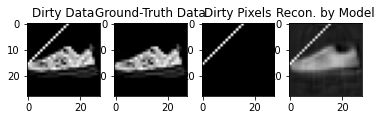

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


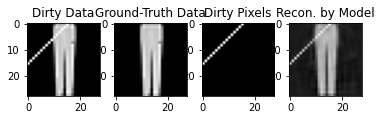

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


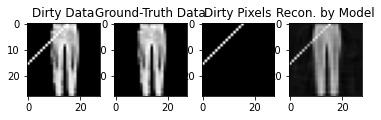

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


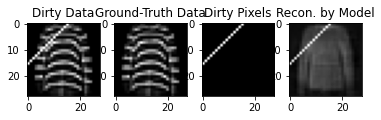

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


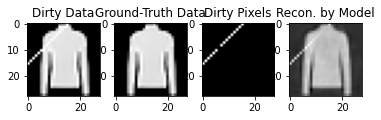

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


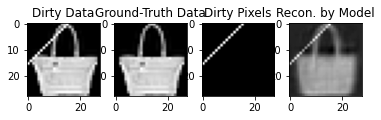

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


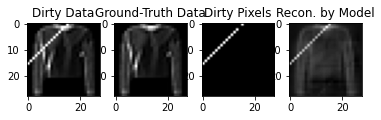

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


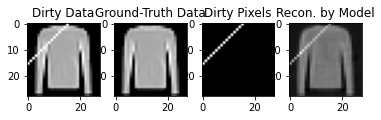

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


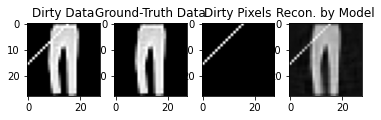

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


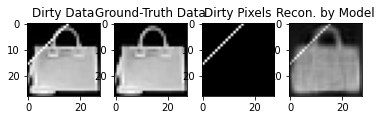







Noise Tag: 7
Noise Indices: 
[24116, 1936, 30892, 436, 45639, 12774, 7036, 15748, 42345, 33410, 6895, 30732, 44321, 32808, 4941, 3345, 41802, 19475, 31290, 1214, 7779, 42162, 12423, 9815, 40017, 48751, 52087, 15935, 52165, 44593, 22784, 39842, 19136, 28107, 11035, 19283, 38796, 5210, 33783, 13330, 43729, 44077, 32772, 46487, 22866, 37235, 46813, 31233, 24933, 36083, 24674, 11357, 19472, 22532, 9783, 3935, 23688, 1962, 16373, 44872, 28605, 48475, 19844, 18389, 33815, 31561, 52914, 41207, 32861, 52985, 49168, 50930, 26936, 37179, 51109, 12670, 7236, 37932, 30604, 42300, 31331, 53210, 45128, 44003, 10767, 1135, 43785, 45199, 45450, 30053, 9551, 31890, 38569, 42981, 12302, 36436, 11922, 26980, 36273, 33525, 44014, 20494, 5607, 22666, 52979, 3543, 49510, 44165, 33109, 31596, 40989, 43148, 26160, 26950, 10551, 11271, 42268, 25520, 2275, 27541, 2255, 52100, 37045, 46475, 17222, 10502, 11094, 5412, 8347, 46890, 30175, 19604, 42317, 24251, 28590, 38278, 22985, 25298, 31439, 5236, 15862, 2

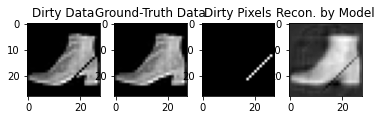

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


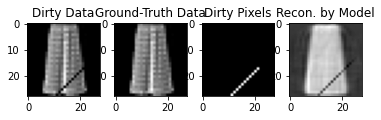

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


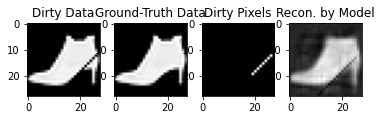

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


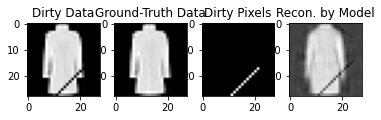

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


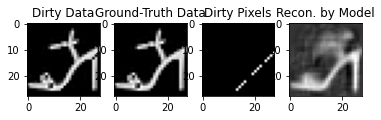

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


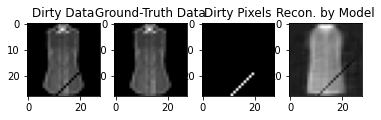

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


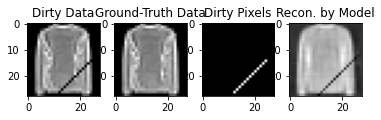

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


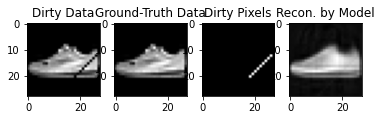

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


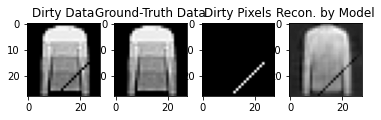

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


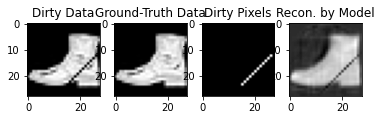

In [37]:
## show per noise type images: y_noise_lists or y_noise_dict

max_show_n = 10

for noise_key, noise_idxs in y_noise_dict_train.items():
    
    print("Noise Tag: {}".format(noise_key))
    print("Noise Indices: \n{}".format(noise_idxs))
    
    _selected_idxs = np.random.permutation(noise_idxs)[:max_show_n]
    
    for idx in _selected_idxs:
    
        print("y_class (clean): {} | y_noise: {} | y_noise_tag (noise type): {}".format(
            0, y_noise_instance_train[idx], noise_key)) # y_class_train[idx]
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(x_train_orig[idx,...],cmap="gray")
        ax[0].set_title("Dirty Data")
        ax[1].imshow(x_train_clean_orig[idx,...],cmap="gray")
        ax[1].set_title("Ground-Truth Data")
        ax[2].imshow(y_noise_pixels_train[idx,...],cmap="gray")
        ax[2].set_title("Dirty Pixels")
        #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].set_title("Recon. by Model")
        plt.show()
        
    print("\n\n\n\n\n")


### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

In [38]:
len(trusted_idxs_train)

180

y_noise: 0


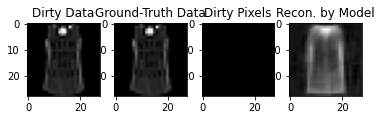

y_noise: 0


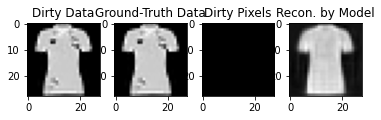

y_noise: 0


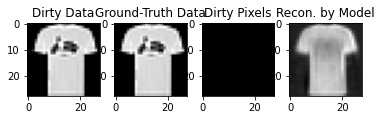

y_noise: 0


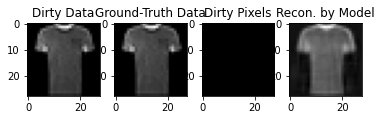

y_noise: 0


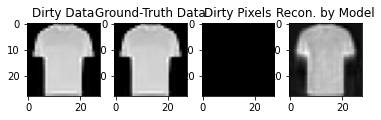

y_noise: 0


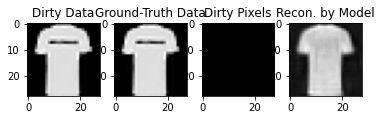

y_noise: 0


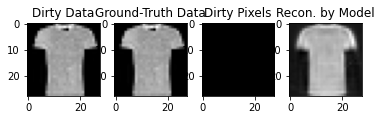

y_noise: 0


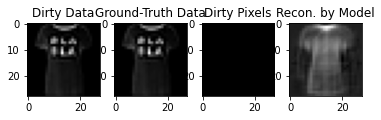

y_noise: 0


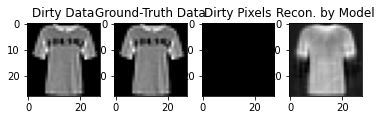

y_noise: 0


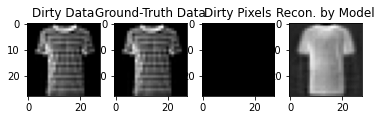

y_noise: 0


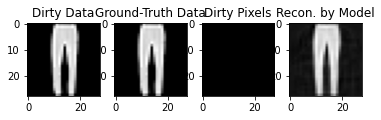

y_noise: 0


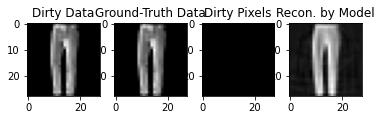

y_noise: 0


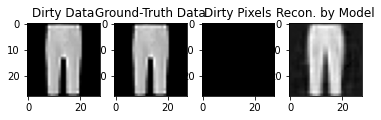

y_noise: 0


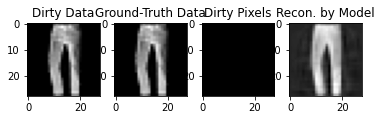

y_noise: 0


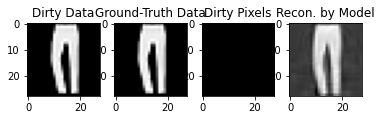

y_noise: 0


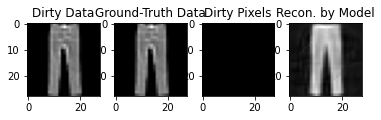

y_noise: 0


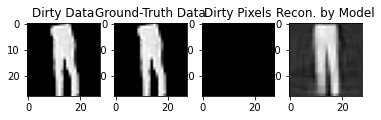

y_noise: 0


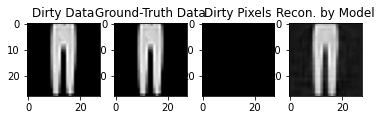

y_noise: 0


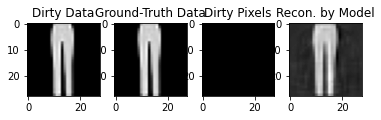

y_noise: 0


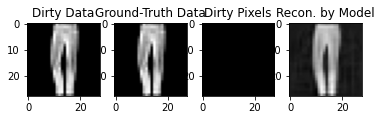

y_noise: 0


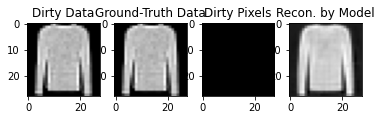

y_noise: 0


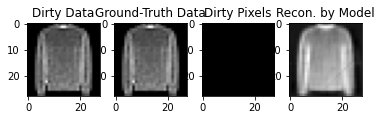

y_noise: 0


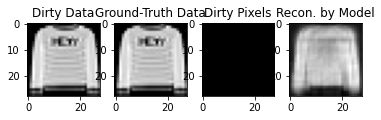

y_noise: 0


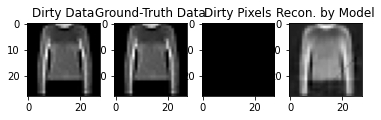

y_noise: 0


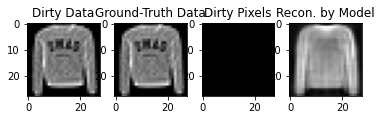

y_noise: 0


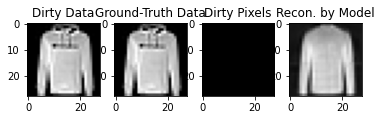

y_noise: 0


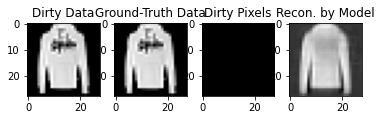

y_noise: 0


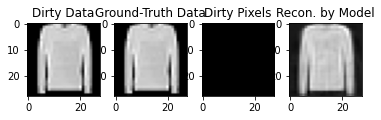

y_noise: 0


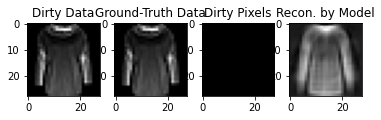

y_noise: 0


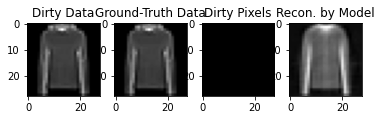

y_noise: 0


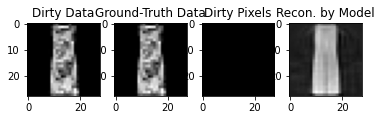

y_noise: 0


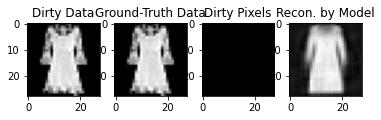

y_noise: 0


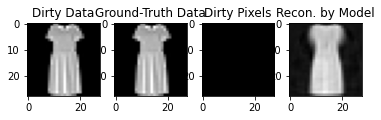

y_noise: 0


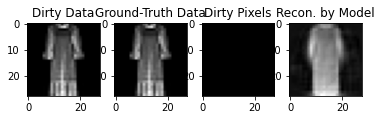

y_noise: 0


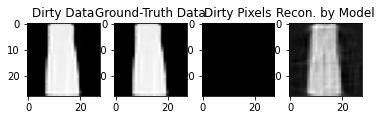

y_noise: 0


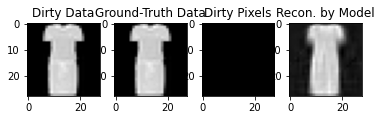

y_noise: 0


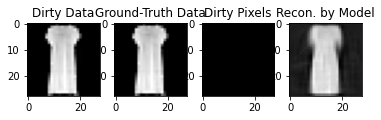

y_noise: 0


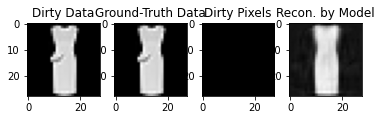

y_noise: 0


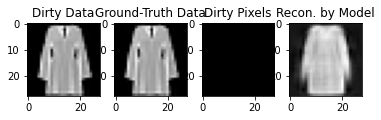

y_noise: 0


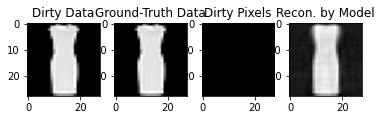

y_noise: 0


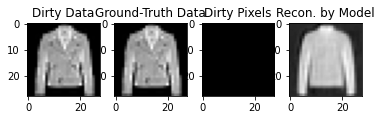

y_noise: 0


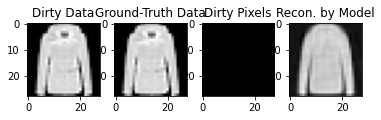

y_noise: 0


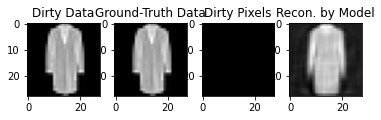

y_noise: 0


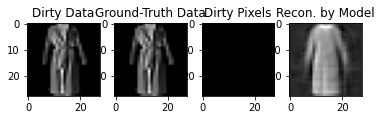

y_noise: 0


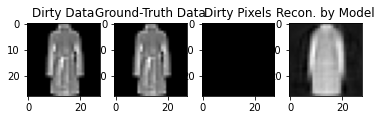

y_noise: 0


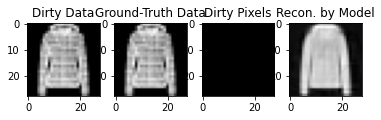

y_noise: 0


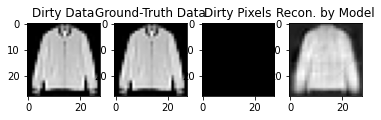

y_noise: 0


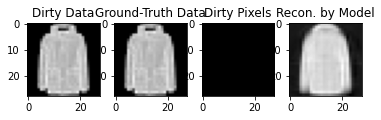

y_noise: 0


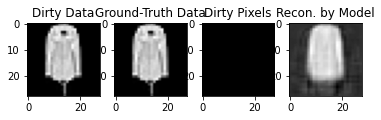

y_noise: 0


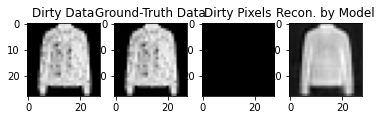

y_noise: 0


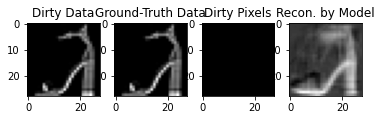

y_noise: 0


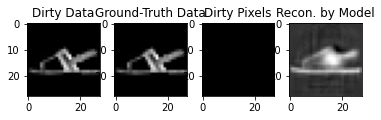

y_noise: 0


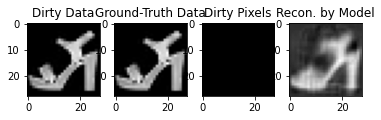

y_noise: 0


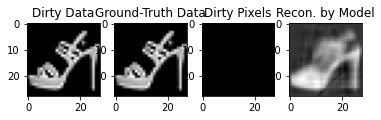

y_noise: 0


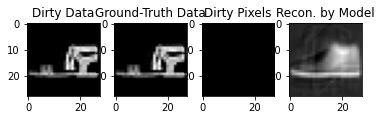

y_noise: 0


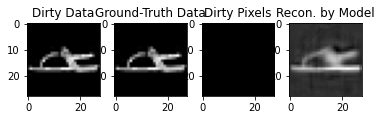

y_noise: 0


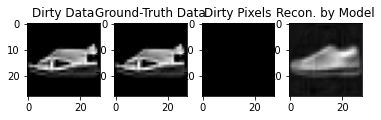

y_noise: 0


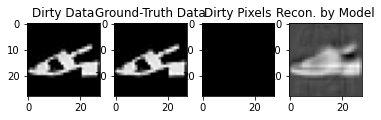

y_noise: 0


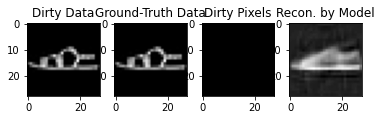

y_noise: 0


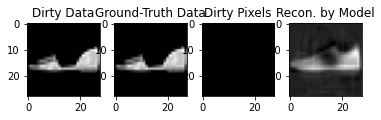

y_noise: 0


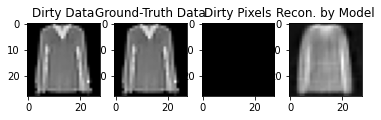

y_noise: 0


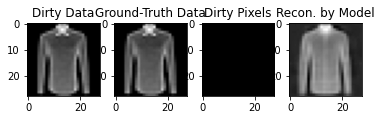

y_noise: 0


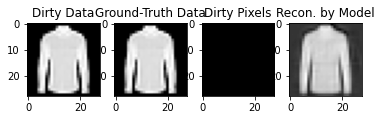

y_noise: 0


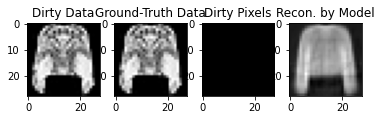

y_noise: 0


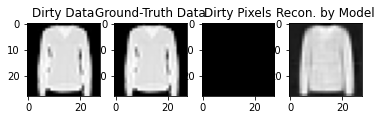

y_noise: 0


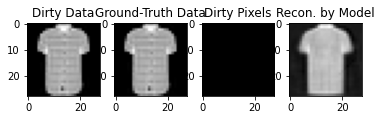

y_noise: 0


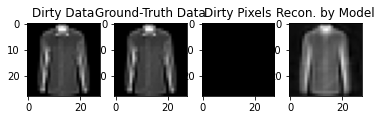

y_noise: 0


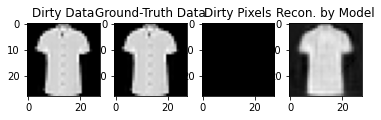

y_noise: 0


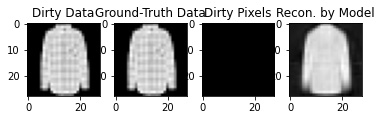

y_noise: 0


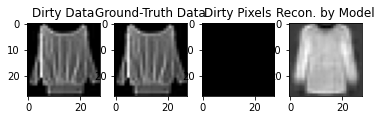

y_noise: 0


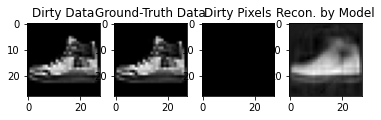

y_noise: 0


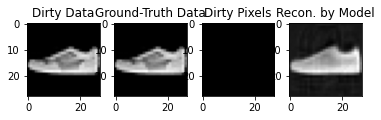

y_noise: 0


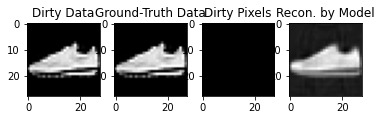

y_noise: 0


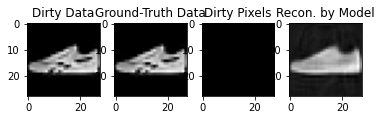

y_noise: 0


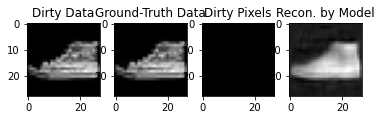

y_noise: 0


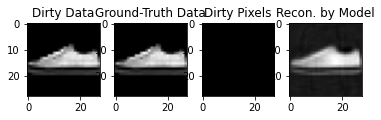

y_noise: 0


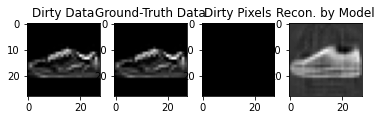

y_noise: 0


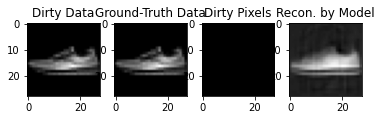

y_noise: 0


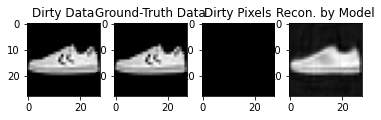

y_noise: 0


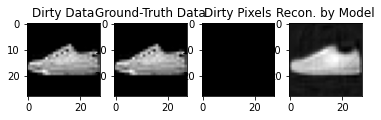

y_noise: 0


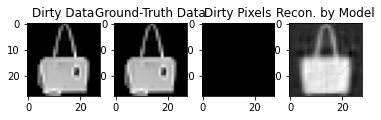

y_noise: 0


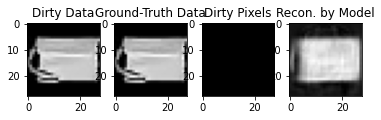

y_noise: 0


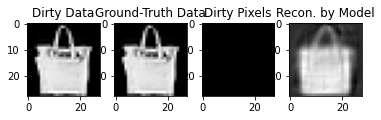

y_noise: 0


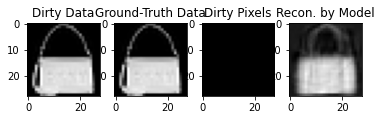

y_noise: 0


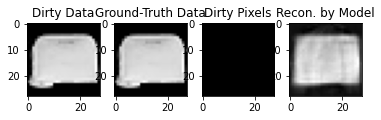

y_noise: 0


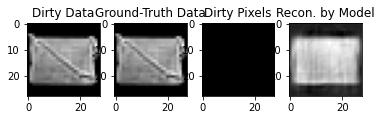

y_noise: 0


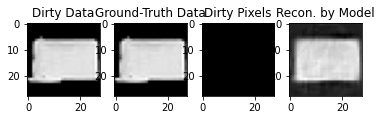

y_noise: 0


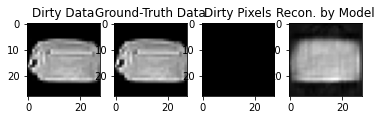

y_noise: 0


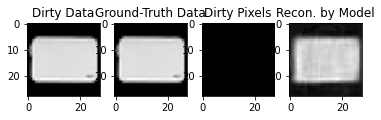

y_noise: 0


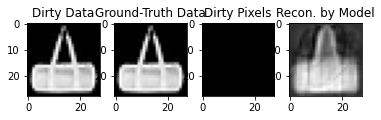

y_noise: 0


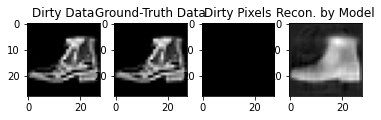

y_noise: 0


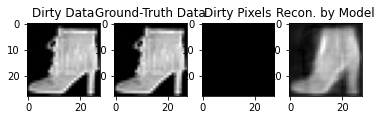

y_noise: 0


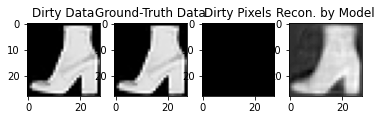

y_noise: 0


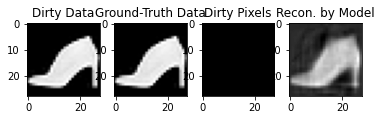

y_noise: 0


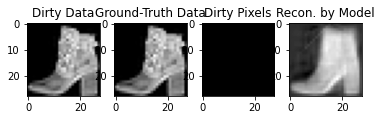

y_noise: 0


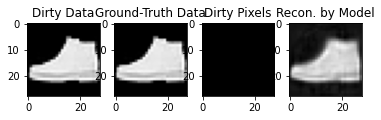

y_noise: 0


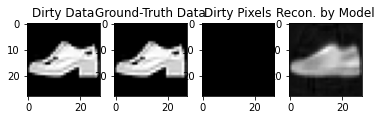

y_noise: 0


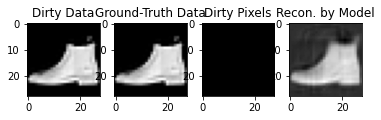

y_noise: 0


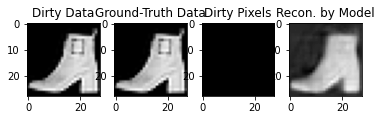

y_noise: 0


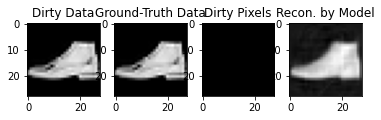

y_noise: 1


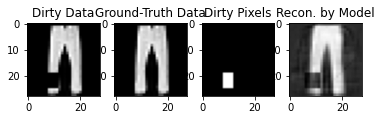

y_noise: 1


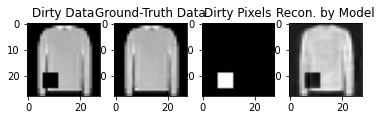

y_noise: 1


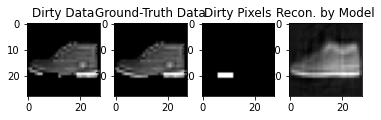

y_noise: 1


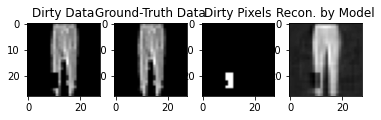

y_noise: 1


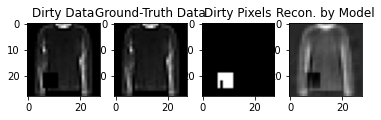

y_noise: 1


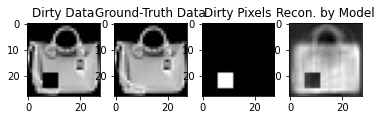

y_noise: 1


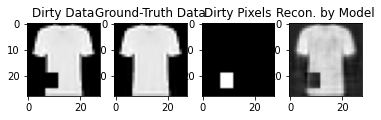

y_noise: 1


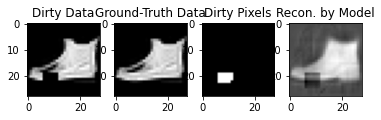

y_noise: 1


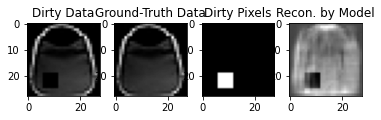

y_noise: 1


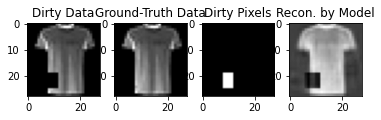

y_noise: 1


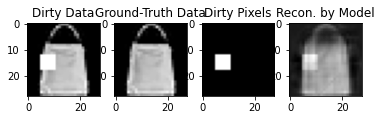

y_noise: 1


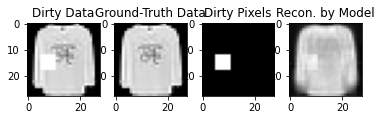

y_noise: 1


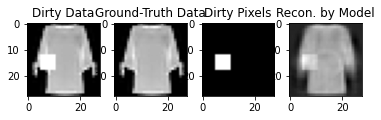

y_noise: 1


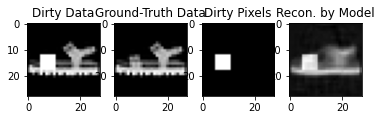

y_noise: 1


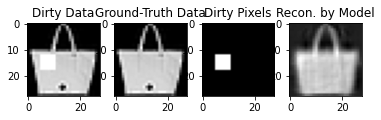

y_noise: 1


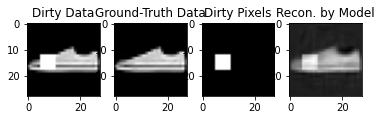

y_noise: 1


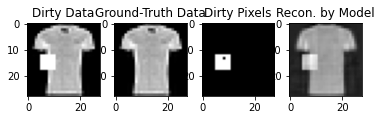

y_noise: 1


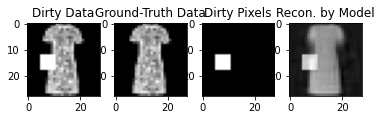

y_noise: 1


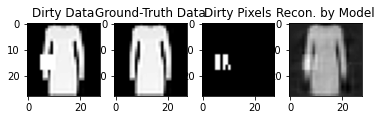

y_noise: 1


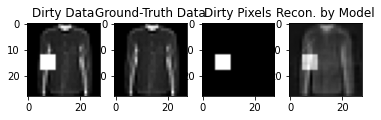

y_noise: 1


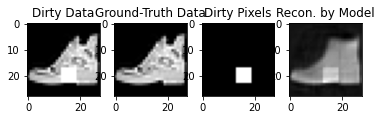

y_noise: 1


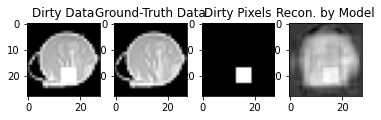

y_noise: 1


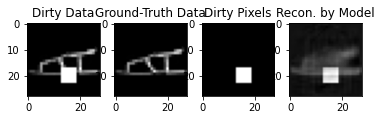

y_noise: 1


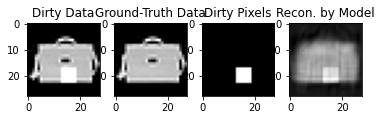

y_noise: 1


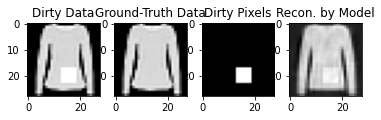

y_noise: 1


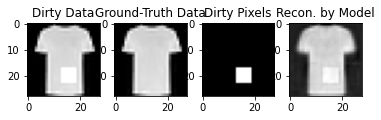

y_noise: 1


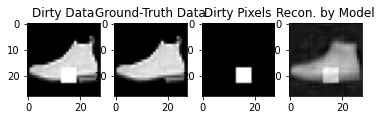

y_noise: 1


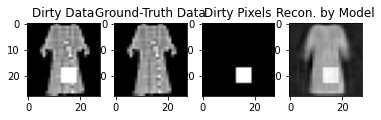

y_noise: 1


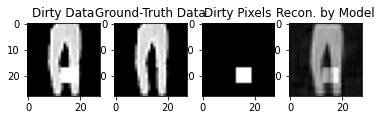

y_noise: 1


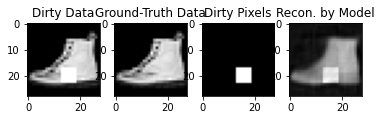

y_noise: 0


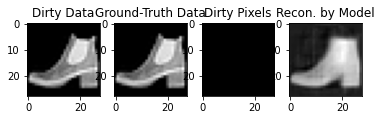

y_noise: 0


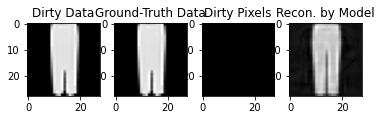

y_noise: 1


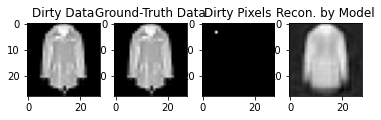

y_noise: 0


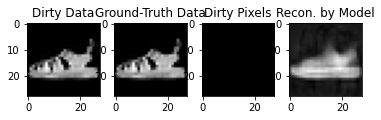

y_noise: 1


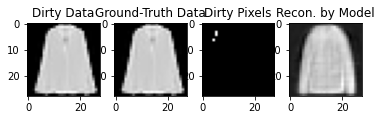

y_noise: 0


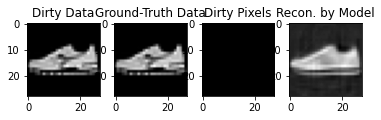

y_noise: 0


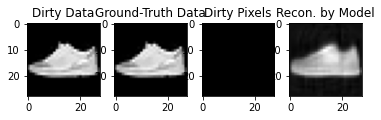

y_noise: 0


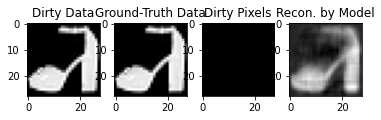

y_noise: 0


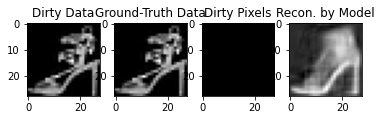

y_noise: 0


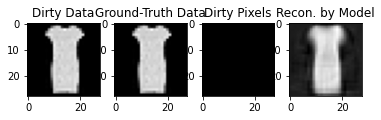

y_noise: 0


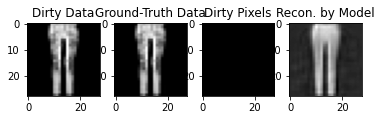

y_noise: 1


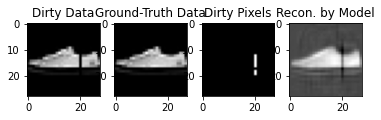

y_noise: 1


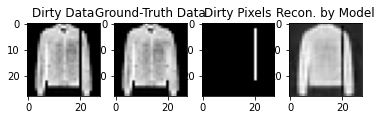

y_noise: 1


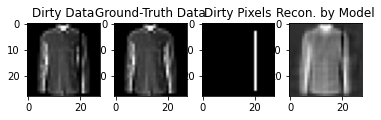

y_noise: 1


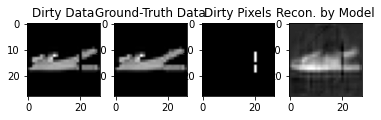

y_noise: 1


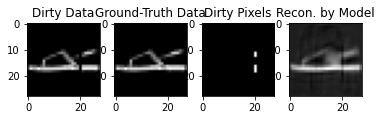

y_noise: 1


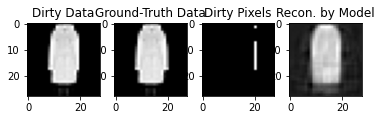

y_noise: 1


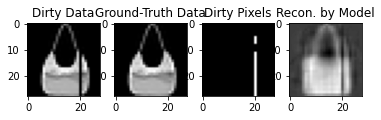

y_noise: 1


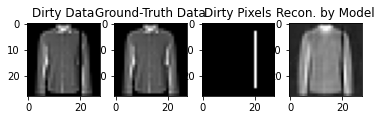

y_noise: 1


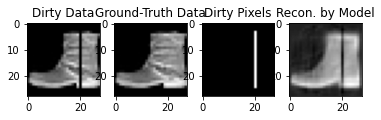

y_noise: 1


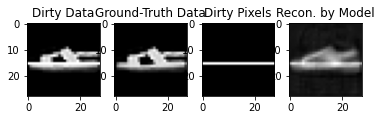

y_noise: 1


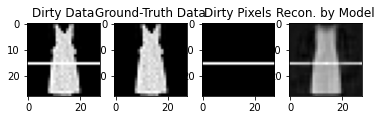

y_noise: 1


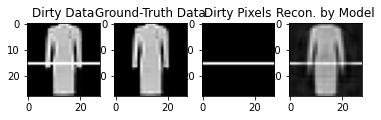

y_noise: 1


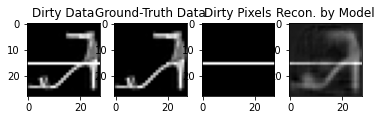

y_noise: 1


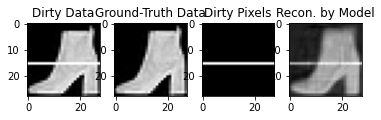

y_noise: 1


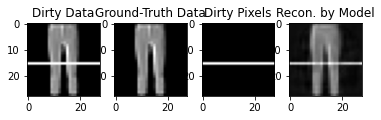

y_noise: 1


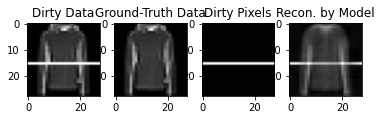

y_noise: 1


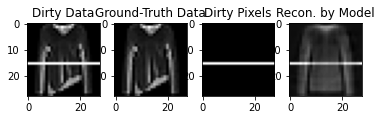

y_noise: 1


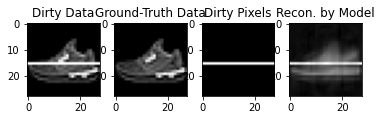

y_noise: 1


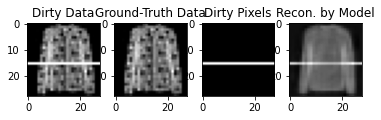

y_noise: 1


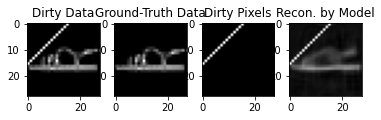

y_noise: 1


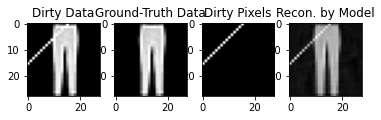

y_noise: 1


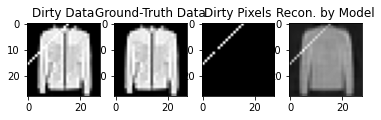

y_noise: 1


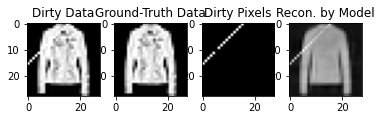

y_noise: 1


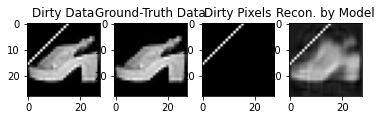

y_noise: 1


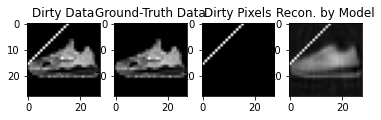

y_noise: 1


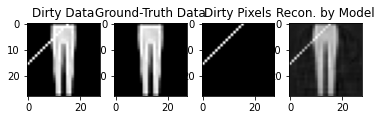

y_noise: 1


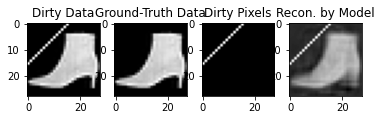

y_noise: 1


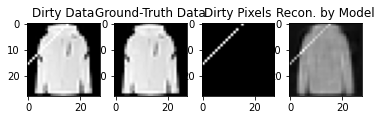

y_noise: 1


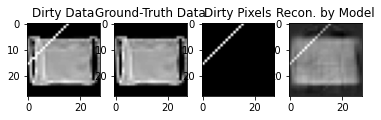

y_noise: 1


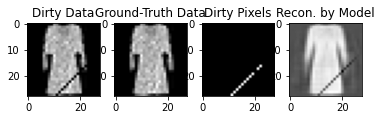

y_noise: 1


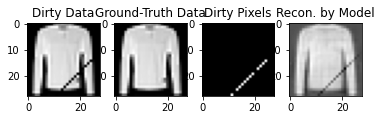

y_noise: 1


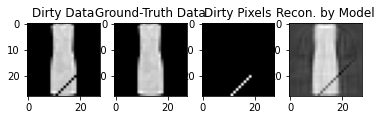

y_noise: 1


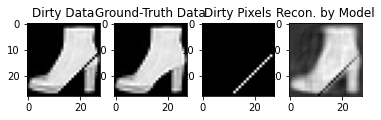

y_noise: 1


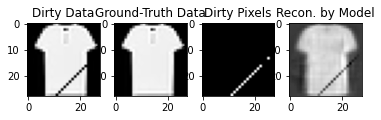

y_noise: 1


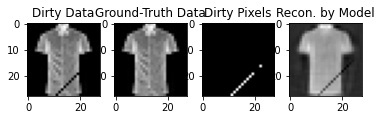

y_noise: 1


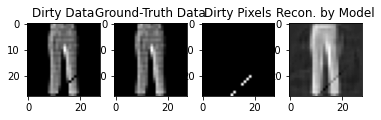

y_noise: 1


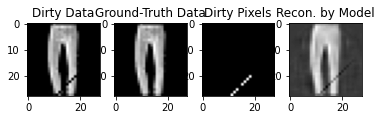

y_noise: 1


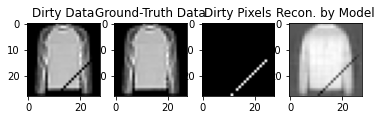

y_noise: 1


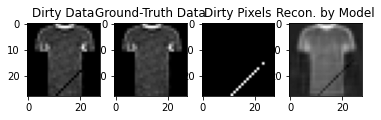

In [39]:
    
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Latent Space

In [40]:
# noised_rows = y_noise_instance_train
# noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [41]:
# from sklearn.decomposition import PCA

# all_z_train = np.concatenate([z_train_clean,z_train_dirty], axis=0)
# pca_2d_z = PCA(n_components=2) # PCA
# pca_2d_z.fit(all_z_train)

In [42]:
# pca_2d_z.explained_variance_

In [43]:
# z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)
# z_train_pca2d_dirty = pca_2d_z.transform(z_train_dirty)

In [44]:
# df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
#                                    "x_2": z_train_pca2d_clean[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

In [45]:
# df_plot_z_pca2d_y0 = pd.DataFrame({"x_1": z_train_pca2d_dirty[:,0], 
#                                    "x_2": z_train_pca2d_dirty[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y0)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Kernel PCA

In [46]:
# from sklearn.decomposition import KernelPCA

# kpca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
# kpca_2d_z.fit(all_z_train)

In [47]:
# z_train_kpca2d_clean = kpca_2d_z.transform(z_train_clean)
# z_train_kpca2d_dirty = kpca_2d_z.transform(z_train_dirty)

In [48]:
# df_plot_z_kpca2d_y1 = pd.DataFrame({"x_1": z_train_kpca2d_clean[:,0], 
#                                     "x_2": z_train_kpca2d_clean[:,1], 
#                                     "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y1)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

In [49]:
# df_plot_z_kpca2d_y0 = pd.DataFrame({"x_1": z_train_kpca2d_dirty[:,0], 
#                                     "x_2": z_train_kpca2d_dirty[:,1], 
#                                     "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y0)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

#### T-SNE

In [50]:
# from sklearn.manifold import TSNE

In [51]:
# tsne_2d_z = TSNE(n_components=2, perplexity=180.0, n_iter=5000)
# _z_all_2d = tsne_2d_z.fit_transform(all_z_train)

In [52]:
# _len_dataset = z_train_pca2d_clean.shape[0]

# z_train_tsne2d_clean = _z_all_2d[:_len_dataset]
# z_train_tsne2d_dirty = _z_all_2d[_len_dataset:]

In [53]:
# df_plot_z_tsne2d_y1 = pd.DataFrame({"x_1": z_train_tsne2d_clean[:,0], 
#                                    "x_2": z_train_tsne2d_clean[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y1)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

In [54]:
# df_plot_z_tsne2d_y0 = pd.DataFrame({"x_1": z_train_tsne2d_dirty[:,0], 
#                                    "x_2": z_train_tsne2d_dirty[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y0)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Approx. Log-Likelihood

In [55]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [56]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();


In [57]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae_map = log_px_approx_eval(vae_mdl,
                                       dataset_obj,
                                       x_inputs,
                                       k_samples=250,
                                       y_comps=True,
                                       batch_size=128)

    # to clear GPU Mem -- if used.
    log_px_est_y1 = elbo_iwae_map["y1"].clone().cpu()
    log_px_est_y0 = elbo_iwae_map["y0"].clone().cpu()
    
    del elbo_iwae_map["y1"]
    del elbo_iwae_map["y0"]
    del elbo_iwae_map
    torch.cuda.empty_cache()


Compute Progress: 100%|███████████████████████████████████████████| 422/422 [00:16<00:00, 25.50it/s]


In [58]:
# print(prof)

In [59]:
arrs_elbo_iwae = np.concatenate([log_px_est_y1,log_px_est_y0,y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px_y1", "log_px_y0", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [60]:
df_elbo_iwae

log_px_y1   log_px_y0 noise_label
0      522.355103  504.842590       clean
1      514.252075  482.603760       clean
2      348.936218  329.190094       dirty
3      468.884003  442.035248       clean
4      736.916931  703.942017       clean
...           ...         ...         ...
53995  405.833221  379.318634       clean
53996   20.847248   -9.344170       clean
53997  683.746521  654.516846       clean
53998  620.867554  586.478088       clean
53999  659.777039  630.156067       clean

[54000 rows x 3 columns]

In [61]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

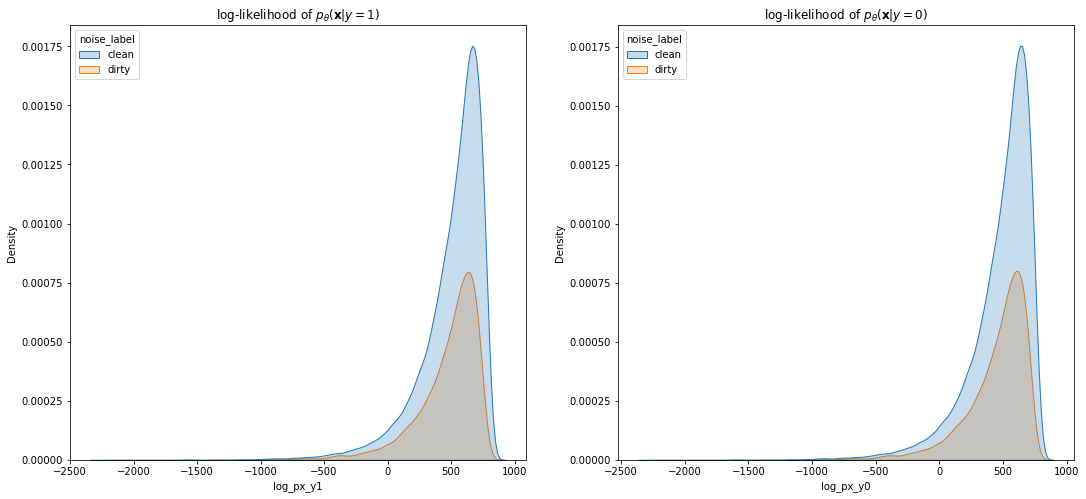

In [62]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.kdeplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", fill=True, legend=True)

axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")


sns.kdeplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", fill=True, legend=True)

axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


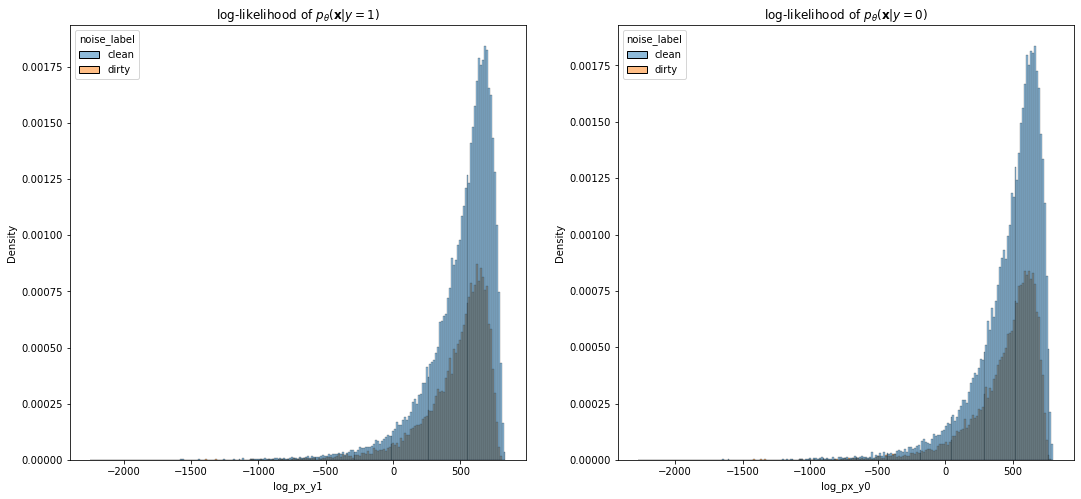

In [63]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.histplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=True, stat="density")
axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")

sns.histplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=True, stat="density")
axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


In [64]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins


In [65]:
tops, bin_edges = epdf([log_px_est_y1.numpy().flatten()[~y_noise_instance_train], log_px_est_y1.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [66]:
np.sum(np.abs(top_model - top_data))

0.0013611510212698046

In [67]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [68]:
histogram_intersection(tops[0], tops[1], bin_edges)

0.9161484666620265